simulating the boltzman distribution

https://www.youtube.com/watch?v=65kl4eE9ovI 

following this video

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib import animation
#plt.style.use(['science','notebook'])
from itertools import combinations
import IPython

In [34]:
n_particles = 400
r = np.random.random((2,n_particles)) #inital positions
#Color particles the start on either side
ixr = r[0]>0.5
ixl = r[0]<=0.5

In [35]:
#id for each particle
ids = np.arange(n_particles)

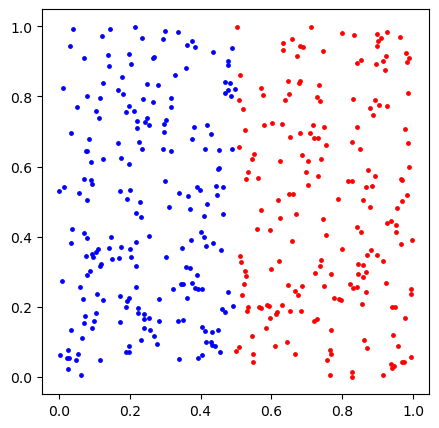

In [36]:
#plot initial configuration
plt.figure(figsize=(5,5))
plt.scatter(r[0][ixr],r[1][ixr],color = "r",s = 6)
plt.scatter(r[0][ixl],r[1][ixl],color = "b", s=6)

In [37]:
#inital velocities in the gas
# assume right particles are moving left and vice versa

# we assume that the particels in a gas move at approximately 500m/s - from google

v = np.zeros_like(r)
v[0][ixr] = -500
v[0][ixr] = 500


# detecting collisions - distance between pairs

as soon as distance between centers is less than r1 + r2 the spheres collide :)

for simplicity we assume all the particles are the same size


In [38]:
id_pairs = np.asarray(list(combinations(ids,2)))
id_pairs.shape

(79800, 2)

In [39]:
#Obtain distances between particles hte same way

x_pairs = np.asarray(list(combinations(r[0],2)))
y_pairs = np.asarray(list(combinations(r[1],2)))
dx_pairs = np.diff(x_pairs,axis=1).ravel()
dy_pairs = np.diff(y_pairs,axis=1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2) #this sqrt might slow things dow   
 
d_pairs


array([0.15543599, 0.06905387, 0.36291321, ..., 0.28518284, 0.28769523,
       0.13656112])

# velocities of a collision

elastic collision between 2 spheres

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msubsup>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>v</mi>
        <mo stretchy="false">&#x2192;</mo>
      </mover>
    </mrow>
    <mn>1</mn>
    <mrow data-mjx-texclass="ORD">
      <mtext>new</mtext>
    </mrow>
  </msubsup>
  <mo>=</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>v</mi>
        <mo stretchy="false">&#x2192;</mo>
      </mover>
    </mrow>
    <mn>1</mn>
  </msub>
  <mo>&#x2212;</mo>
  <mfrac>
    <mrow>
      <mo stretchy="false">(</mo>
      <msub>
        <mrow data-mjx-texclass="ORD">
          <mover>
            <mi>v</mi>
            <mo stretchy="false">&#x2192;</mo>
          </mover>
        </mrow>
        <mn>1</mn>
      </msub>
      <mo>&#x2212;</mo>
      <msub>
        <mrow data-mjx-texclass="ORD">
          <mover>
            <mi>v</mi>
            <mo stretchy="false">&#x2192;</mo>
          </mover>
        </mrow>
        <mn>2</mn>
      </msub>
      <mo stretchy="false">)</mo>
      <mo>&#x22C5;</mo>
      <mo stretchy="false">(</mo>
      <msub>
        <mrow data-mjx-texclass="ORD">
          <mover>
            <mi>r</mi>
            <mo stretchy="false">&#x2192;</mo>
          </mover>
        </mrow>
        <mn>1</mn>
      </msub>
      <mo>&#x2212;</mo>
      <msub>
        <mrow data-mjx-texclass="ORD">
          <mover>
            <mi>r</mi>
            <mo stretchy="false">&#x2192;</mo>
          </mover>
        </mrow>
        <mn>2</mn>
      </msub>
      <mo stretchy="false">)</mo>
    </mrow>
    <mrow>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <msub>
        <mrow data-mjx-texclass="ORD">
          <mover>
            <mi>r</mi>
            <mo stretchy="false">&#x2192;</mo>
          </mover>
        </mrow>
        <mn>1</mn>
      </msub>
      <mo>&#x2212;</mo>
      <msub>
        <mrow data-mjx-texclass="ORD">
          <mover>
            <mi>r</mi>
            <mo stretchy="false">&#x2192;</mo>
          </mover>
        </mrow>
        <mn>2</mn>
      </msub>
      <msup>
        <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
        <mn>2</mn>
      </msup>
    </mrow>
  </mfrac>
  <mo stretchy="false">(</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>r</mi>
        <mo stretchy="false">&#x2192;</mo>
      </mover>
    </mrow>
    <mn>1</mn>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>r</mi>
        <mo stretchy="false">&#x2192;</mo>
      </mover>
    </mrow>
    <mn>2</mn>
  </msub>
  <mo stretchy="false">)</mo>
</math>

## DOT PRODUCT IS DISTRIBUTIVE OVER ADDITION - https://math.stackexchange.com/questions/1109142/proving-that-the-dot-product-is-distributive

The particels simply excahnge velocities relative to the norm vector 

(r1 - r2)/norm(r1-r2) is simply the unit vector - so we project onto it with the dot product and then times this by the unit vector to get the projection vector :)

https://en.wikipedia.org/wiki/Elastic_collision

The numerator is the projection of the net velocity on the normal vector between the 2 particle positions

since particles are same size the mass terms cancel out and we get these nice equations

In [40]:
radius = 0.06
collision_ids = id_pairs[d_pairs < 2*radius]


In [44]:
v1 = v[:,collision_ids[:,0]]
v2 = v[:,collision_ids[:,1]]
r1 = r[:,collision_ids[:,0]]
r2 = r[:,collision_ids[:,1]]

In [64]:
v1_new = np.diag((v1-v2).T @ (r1-r2))/np.sum((r1-r2)**2,axis = 0) * (r1-r2)
v2_new = np.diag((v2-v1).T @ (r2-r1))/np.sum((r2-r1)**2,axis =0) * (r2-r1)
# we only care about the diagonal as this is the dot product 
# corresponding pairs of values of each collision


# summing this up in some functions to help us run our simulation

In [69]:
def get_delta_pairs(x, ids_pairs):
    return np.diff(np.array([x[ids_pairs[:,0]], x[ids_pairs[:,1]]]).T, axis=1).ravel()

def get_deltad_pairs(r, ids_pairs):
    return np.sqrt(get_delta_pairs(r[0], ids_pairs)**2 + get_delta_pairs(r[1], ids_pairs)**2)

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = np.zeros((ts, r.shape[0], r.shape[1]))
    vs = np.zeros_like(rs)
    #inital state
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1,ts):
        ic = id_pairs[get_deltad_pairs(r,id_pairs) < d_cutoff] # 2 cols
        
        #particle collisions
        v[:,ic[:,0]], v[:,ic[:,1]] = \
            compute_new_v(v[:,ic[:,0]],v[:,ic[:,1]],r[:,ic[:,0]],r[:,ic[:,1]])
        
        #wall collisions
        v[0,r[0]>1] = -np.abs(v[0,r[0]>1]) #not sure if you need the np.abs
        v[0,r[0]<0] = np.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1]) #not sure if you need the np.abs
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])

        #update position - and save
        r = r + v*dt
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs



# SIMUALTION!

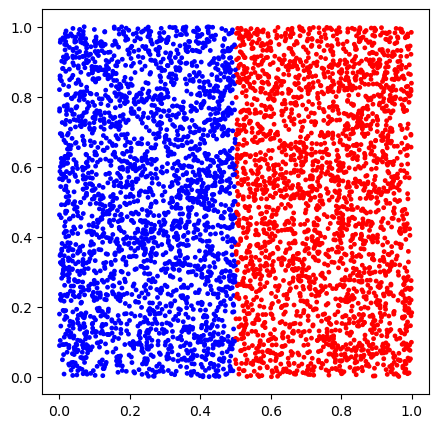

In [200]:
radius = 0.0015
dt = 0.000008
ts = 1000
n_particles = 5000

ids = np.arange(n_particles)
id_pairs = np.asarray(list(combinations(ids,2)))


r = np.random.random((2,n_particles)) #inital positions
ixr = r[0]>0.5
ixl = r[0]<=0.5
v = np.zeros_like(r)
v[0][ixr] = -500
v[0][ixl] = 500

#plot initial configuration
plt.figure(figsize=(5,5))
col = ["red" if i else "blue" for i in ixr]
plt.scatter(r[0],r[1],c = col,s = 6)


In [201]:
# wow c is very fast :)
rs, vs = motion(r, v, id_pairs, \
                ts = ts, dt = dt, d_cutoff = 2*radius)

# Animation

In [218]:
# simple animation function
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
x_bounds = (0,1)
y_bounds = (0,1)
ax1.set_xlim(*x_bounds)
ax1.set_ylim(*y_bounds)
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.set_ylim(0,0.01)

#scatter plot
col = ["red" if i else "blue" for i in ixr]
path_collection = ax1.scatter(rs[0,0],rs[0,1],c = col,s = 10)

#histogram
v_ = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)
ax2.plot(v_,fv)

bin_bounds = np.linspace(0,1500,50)
n, bins, patches = \
      ax2.hist(np.sqrt(np.sum(vs[0]**2, axis=0)), 
               bins=bin_bounds, density=True)


def init():
    return path_collection, patches

def update(frame):
    path_collection.set_offsets(rs[frame].T)
    n, bins = np.histogram(np.sqrt(np.sum(vs[frame]**2, axis=0)), 
               bins=bin_bounds, density=True)
    for patch, new_height in zip(patches, n):
        patch.set_height(new_height)
    return path_collection, patches

ani = animation.FuncAnimation(fig=fig, init_func = init, 
                              func=update, frames=1000, 
                              interval=100, 
                                blit = False)

plt.close()
IPython.display.HTML(ani.to_jshtml())
ani.save(f"boltzman.gif") #cant also display inline for some reason - not worth figuring out




Animation size has reached 20993105 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.
MovieWriter ffmpeg unavailable; using Pillow instead.


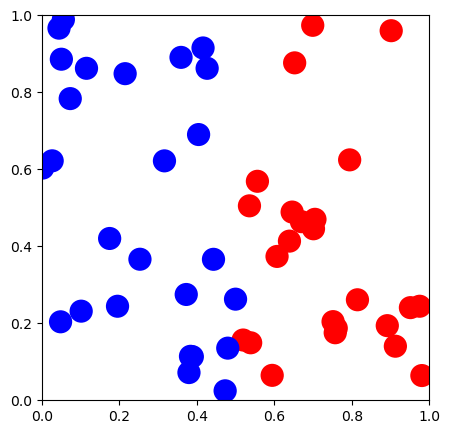

In [175]:
# fig, ax = plt.subplots(1,1,figsize=(5,5))

# xred, yred = rs[0][0][ixr], rs[0][1][ixr]
# xblue, yblue = rs[0][0][ixl],rs[0][1][ixl]
# circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
# circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
# cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
# cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')

# def animate(i):
#     ax.clear()
#     for patch in enumaerate(cred.get_paths():
#         patch.set_center(rs[0,])
#     ax.add_collection(cblue)
#     ax.set_xlim(0,1)
#     ax.set_ylim(0,1)
    
# ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
# plt.close()
# IPython.display.HTML(ani.to_jshtml())

$$ kT = KE_{avg} = \frac{1}{2}m\bar{v^2} \implies \boxed{\frac{m}{kT} = \frac{2}{\bar{v^2}}} $$

$$ \boxed{f(v) = \frac{m}{kT} v \exp\left(-\frac{m}{kT}\frac{v^2}{2} \right)}$$

Text(0, 0.5, '# Particles')

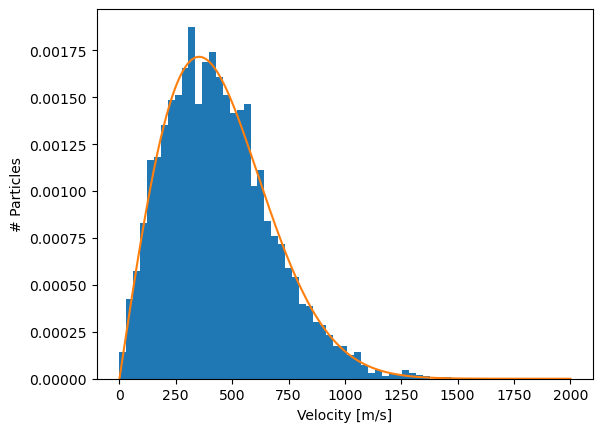

In [204]:
#look at final velocity distribuv
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

bins = np.linspace(0,1500,50)
plt.figure()
plt.hist(np.sqrt(np.sum(vs[400]**2, axis=0)), bins=bins, density=True)

plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')